In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df = df.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','LOR ':'LOR','Chance of Admit ':'Chance_of_Admit'})

In [8]:
df.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [9]:
df['Serial No.'].nunique()

400

In [10]:
df.drop('Serial No.',axis=1,inplace=True)

## EDA

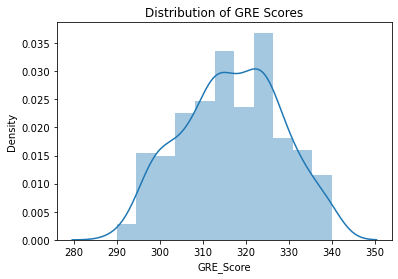

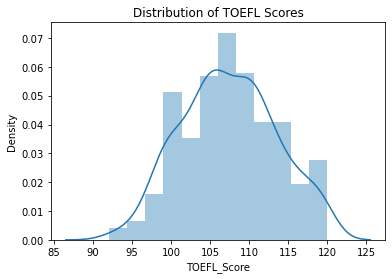

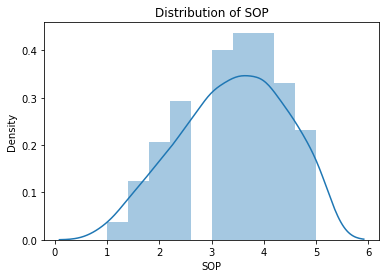

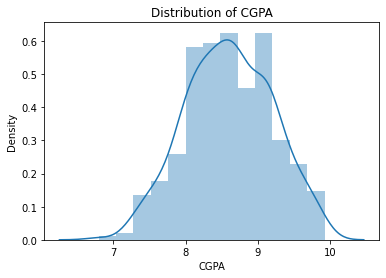

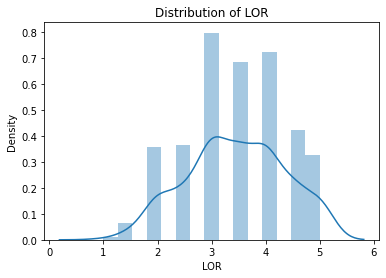

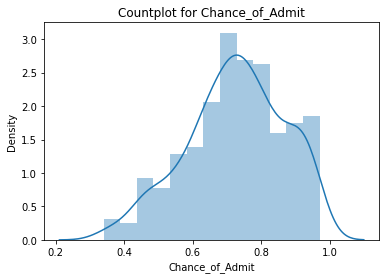

In [11]:
fig = sns.distplot(df['GRE_Score'])
plt.title('Distribution of GRE Scores')
plt.show()

fig = sns.distplot(df['TOEFL_Score'])
plt.title('Distribution of TOEFL Scores')
plt.show()

fig = sns.distplot(df['SOP'])
plt.title('Distribution of SOP')
plt.show()

fig = sns.distplot(df['CGPA'])
plt.title('Distribution of CGPA')
plt.show()

fig = sns.distplot(df['LOR'])
plt.title('Distribution of LOR')
plt.show()

fig = sns.distplot(df['Chance_of_Admit'])
plt.title('Countplot for Chance_of_Admit')
plt.show()

plt.show()

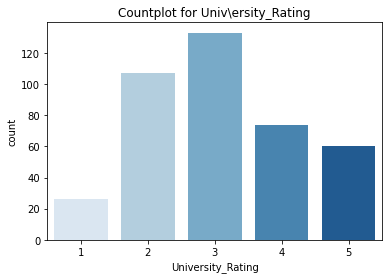

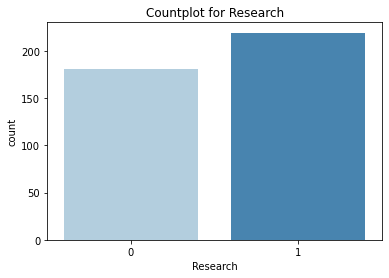

In [12]:
fig = sns.countplot(df['University_Rating'],palette='Blues')
plt.title('Countplot for Univ\ersity_Rating')
plt.show()

fig = sns.countplot(df['Research'],palette='Blues')
plt.title('Countplot for Research')
plt.show()

plt.show()

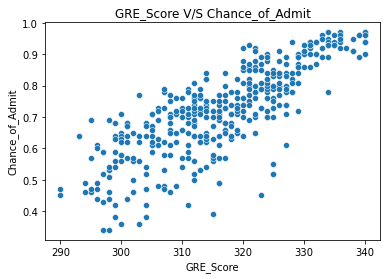

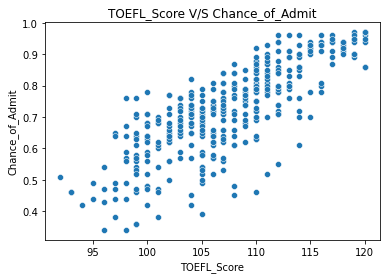

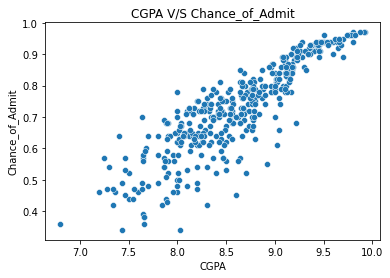

In [13]:

sns.scatterplot(df['GRE_Score'],df['Chance_of_Admit'])
plt.title('GRE_Score V/S Chance_of_Admit')
plt.show()

sns.scatterplot(df['TOEFL_Score'],df['Chance_of_Admit'])
plt.title('TOEFL_Score V/S Chance_of_Admit')
plt.show()

sns.scatterplot(df['CGPA'],df['Chance_of_Admit'])
plt.title('CGPA V/S Chance_of_Admit')
plt.show()


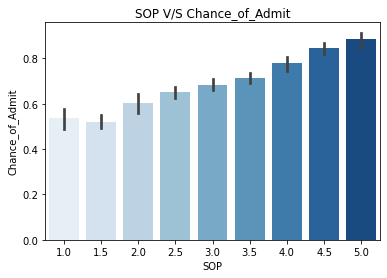

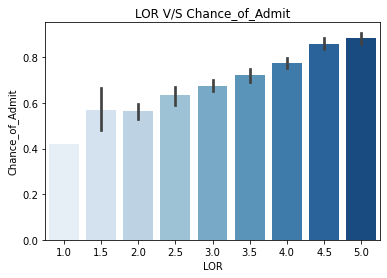

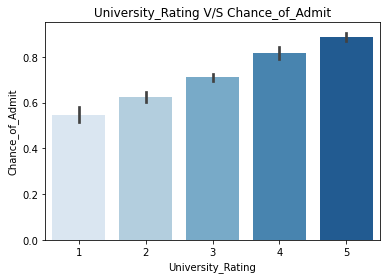

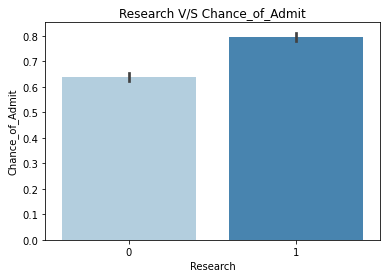

In [14]:
sns.barplot(df['SOP'],df['Chance_of_Admit'],palette='Blues')
plt.title('SOP V/S Chance_of_Admit')
plt.show()

sns.barplot(df['LOR'],df['Chance_of_Admit'],palette='Blues')
plt.title('LOR V/S Chance_of_Admit')
plt.show()

sns.barplot(df['University_Rating'],df['Chance_of_Admit'],palette='Blues')
plt.title('University_Rating V/S Chance_of_Admit')
plt.show()

sns.barplot(df['Research'],df['Chance_of_Admit'],palette='Blues')
plt.title('Research V/S Chance_of_Admit')
plt.show()

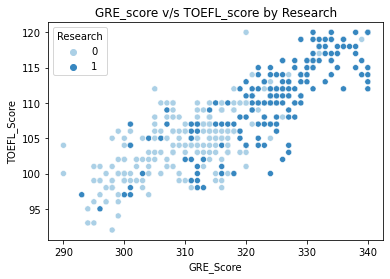

In [15]:
sns.scatterplot(df['GRE_Score'],df['TOEFL_Score'],hue=df['Research'],palette='Blues')
plt.title('GRE_score v/s TOEFL_score by Research')
plt.show()

In [16]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

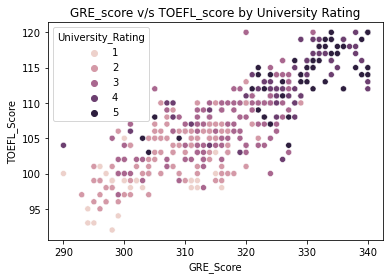

In [17]:
sns.scatterplot(x='GRE_Score',y='TOEFL_Score',hue='University_Rating',data=df)
plt.title('GRE_score v/s TOEFL_score by University Rating')
plt.show()

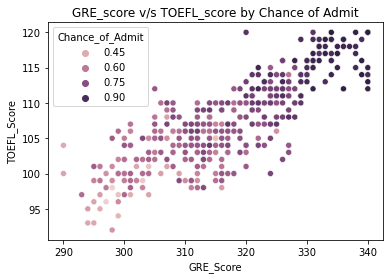

In [18]:
sns.scatterplot(x='GRE_Score',y='TOEFL_Score',hue='Chance_of_Admit',data=df)
plt.title('GRE_score v/s TOEFL_score by Chance of Admit')
plt.show()

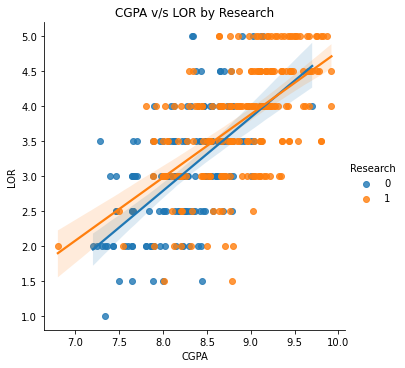

In [19]:
sns.lmplot(x='CGPA',y='LOR',data=df,hue='Research')
plt.title('CGPA v/s LOR by Research')
plt.show()

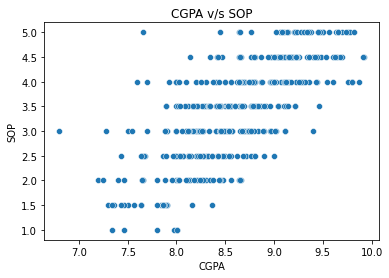

In [20]:
sns.scatterplot(x='CGPA',y='SOP',data=df)
plt.title('CGPA v/s SOP')
plt.show()

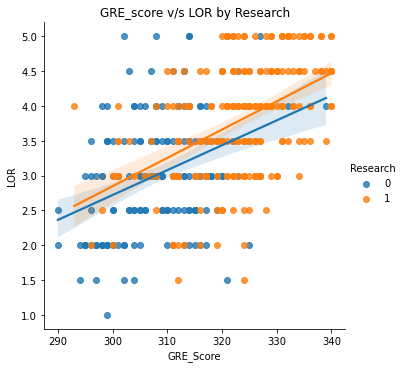

In [21]:
sns.lmplot(x='GRE_Score',y='LOR',data=df,hue='Research')
plt.title('GRE_score v/s LOR by Research')
plt.show()

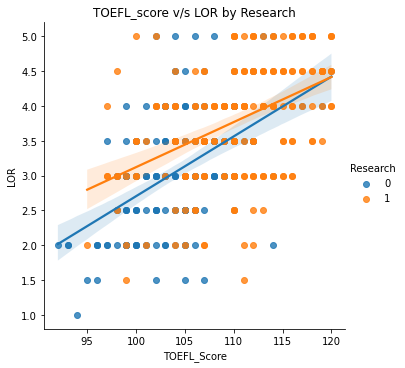

In [22]:
sns.lmplot(x='TOEFL_Score',y='LOR',data=df,hue='Research')
plt.title('TOEFL_score v/s LOR by Research')
plt.show()

<AxesSubplot:>

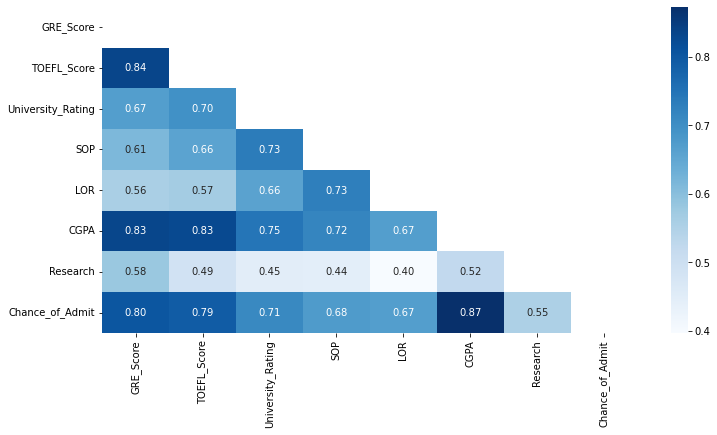

In [23]:
plt.figure(figsize=(12,6))
dropSelf = np.zeros_like(df.corr())
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap='Blues',mask=dropSelf)

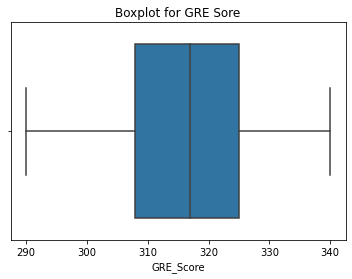

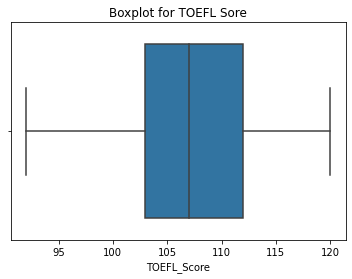

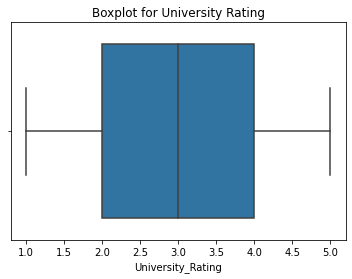

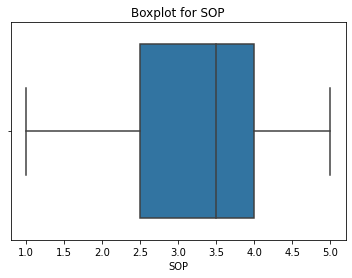

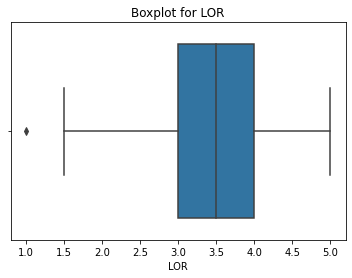

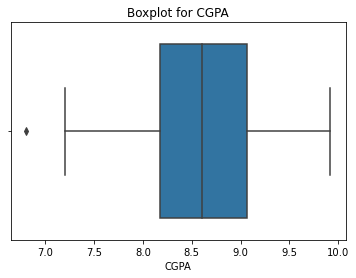

In [24]:
sns.boxplot(df['GRE_Score'])
plt.title('Boxplot for GRE Sore')
plt.show()

sns.boxplot(df['TOEFL_Score'])
plt.title('Boxplot for TOEFL Sore')
plt.show()

sns.boxplot(df['University_Rating'])
plt.title('Boxplot for University Rating')
plt.show()

sns.boxplot(df['SOP'])
plt.title('Boxplot for SOP')
plt.show()

sns.boxplot(df['LOR'])
plt.title('Boxplot for LOR')
plt.show()

sns.boxplot(df['CGPA'])
plt.title('Boxplot for CGPA')
plt.show()


## Model Building

In [25]:
X = df.drop(['Chance_of_Admit'],axis=1)
y = df['Chance_of_Admit']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]


mse_results = []
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = np.sqrt(np.sqrt(mean_squared_error(y_test, predictions)))
    mse_results.append([name, mse])

result = pd.DataFrame(mse_results, columns=['Model', 'RMSE'])
result.sort_values(by='RMSE', ascending=True, inplace=True)

In [28]:
result

,Model,RMSE
1,Linear Regression :,0.260669
9,Ridge:,0.260951
10,BayesianRidge:,0.261380
2,RandomForest :,0.265776
5,AdaBoostClassifier :,0.269339
6,GradientBoostingClassifier:,0.269709
7,Xgboost:,0.276146
12,HuberRegressor:,0.284704
0,DecisionTree :,0.305769
3,KNeighbours :,0.307562


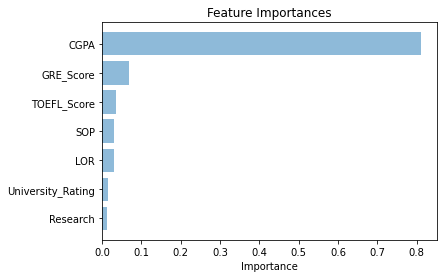

In [29]:
rf = RandomForestRegressor()
rf.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = feature_names
importance_frame['Importance'] = rf.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [30]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.06794853476922821


## Model Building after eliminating Outliers

In [31]:
df.drop(df[df['CGPA'] < 7].index, axis=0, inplace=True)
df.drop(df[df['LOR'] < 1.5].index, axis=0, inplace=True)

In [32]:
X = df.drop(['Chance_of_Admit'],axis=1)
y = df['Chance_of_Admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
lr1 = LinearRegression()
lr1.fit(X_train,y_train)
y_pred1 = lr1.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred1)))

0.06912612343003673


## Hyperparameter Tuning

In [33]:
# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Create a GridSearchCV object
model = Ridge()
search = GridSearchCV(model, param_grid, cv=5)

# Perform the search
search.fit(X_train, y_train)

# Access the best hyperparameters and model
best_params = search.best_params_
best_model = search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.06913679164926269

## Exporting the model

In [34]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(lr,open('lr.pkl','wb'))